Mathematics in Machine Learning thesis developed by Marco Gullotto - s274563
\begin{align}\end{align}
Lecturers: Mauro Gasparini and Francesco Vaccarino  
\begin{align}\end{align}
Date: July 2020

### Introduction

The focus of this project consist of some algorithms and techniques explained during the Mathematics and Machine Learning course.
In particular, regards to supervised learning part, the following topics will be covered:

* K-Nearest Neighbor (KNN)
* Decision tree
* Random forest
* Linear support-vector machines (Linear SVM)
* Logistic regression

As regards the unsupervised part, the concentration will relate to:

* Principal Component Analysis (PCA)
* K-means clustering

All these algorithms will be explained in detail during the preparation of this report, and in relation to most of them, our implementation from scratch will also be provided using the Numpy library. Having said that, we will not focus on how to choose good parameters or how to get a good score: we will therefore omit the cross validation part and the data set will be divided only by train and test set. To better understand the reasons behind this decision, it is necessary to carefully consider the dataset chosen.


### Imports

In [1]:
#General libraries  multi-purpose
import pandas as pd
import numpy as np
import random
import math

#Classifiers + PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.decomposition import PCA

#Metric and useful functions
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

#Libraries to plot graphs
from sklearn.tree import export_graphviz
import plotly.express as px
import plotly.figure_factory as ff
import plotly.graph_objects as go
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.simplefilter(action='ignore')

### The dataset

The database that will be treated collects data related to heart attacks. All basic information is shown in the following table:\begin{align}\end{align}
![alt text](image12.jpg "Heart disease dataset")
\begin{align}\end{align}
It is therefore a small dataset - less than three hundred observations. As already mentioned, given the small number, it is difficult to divide it into more than two parts, therefore the validation set will be omitted. Moreover, when dealing with small data sets, it is often difficult to get a good result, so we will not perform any kind of hyperparameter tuning.
Anyway, before we start applying any kind of algorithm or plotting something, let's take a look at what we're talking about from a medical point of view.


Heart attack is due to a thrombosis of a coronary artery of the heart, or in any case to an occlusion of it. The most frequent cause of closure of an artery is arteriosclerosis: the presence of plaques of solid material that accumulates in the artery until it creates a plug. In this case we speak about thrombosis. If the blood does not arrive because of this closure, oxygen and nourishment will be lacking and the tissue cells will die and the damage becomes irreversible.

Risk factors
Heart attack mainly affects adults and elderly subjects with cardiovascular risk factors, including arterial hypertension, diabetes mellitus, hypercholesterolemia, obesity, cigarette smoking, familiarity for ischemic heart disease. 
Epidemiology and statistics have made possible to identify numerous risk factors - both personal and environmental - that can predispose to coronary artery diseases such as atherosclerosis, angina pectoris, heart attack. These are the so-called "coronary risk factors". One or more of these conditions are found in individuals with heart attack almost without exception. The risk factors are therefore divided into two categories:

1) Uncorrectable:
*  Gender: men are more affected than women.
* Heredity: those who have family members affected by coronary heart disease are more likely to get sick than those who are not familiar with it.
* Diabetes (fasting blood sugar > 120 mg/dL): causes alterations of the small arteries that facilitate the onset of cardiovascular diseases.
* Age: as we age, the chances of heart disease increase.

2) Correctable:
* Smoking: smokers are more exposed to heart, arterial and lung diseases than non-smokers.
* Hypercholesterolemia: it promotes the formation of fat deposits and atherosclerotic plaques on the walls of the arteries which restrict the lumen by hindering the flow of blood.
* High blood pressure: forces the heart to overwork and favors lesions of the arteries. Hypertensive subjects have a higher incidence of diseases of the heart, vessels, kidneys compared to people with normal blood pressure.

The "coronary risk factors" are divided, according to their importance, into major and minor: smoking, hypertension, excess blood cholesterol, diabetes and lack of physical activity are among the first. The simultaneous presence of multiple risk factors in the same individual increases the probability of being affected by coronary heart disease with geometric progression. For example, the risk of heart attack for an average smoker is double compared to a non-smoker: if he also has too much cholesterol in the blood and high blood pressure the risk becomes sixteen times greater.

CPS

The Chest Pain Score (CPS) - introduced by Geleijnse in 2000 - consists of a scoring that evaluates the probability that a subject may have a myocardial infarction given the symptoms clinically presented. This index is an independent risk factor for acute heart attack, and evaluates 4 parameters: pain characteristics, pain localization, pain irradiation, pain associated symptoms. The overall CPS score can be between -2 and +9: a value <4 defines an “atypical chest pain”, of non-cardiac origin, if the score is ≥4, we speak about “typical chest pain”, which is an indication of probable myocardial ischemia. The CPS showed a sensitivity of 87.5% and a specificity of 62.5%.

Diagnosis

The diagnosis of heart attack takes advantage of the contribution of the electrocardiogram (ECG) and of blood tests capable of detecting the presence of "markers" of myocardial cell necrosis in the blood (troponin, myoglobin, MB isoenzyme of the CK, ALT, AST , LDH). 
If the ECG trace shows non-specific and not clearly diagnostic anomalies, it is possible to deepen the study of the coronary arteries by subjecting the patient to a cycle-ergometric test (stress test). This consists in letting the patient pedal on a cyclette. The intensity of effort and the force required to perform it (workload) are gradually increased. The ECG is monitored continuously and blood pressure is measured at regular time intervals. The subject is usually asked to continue until he reaches a heart rate between 80 and 90% of the maximum heart rate, by age and gender. If and when symptoms, such as wheezing or chest pain, become too annoying, or if and when significant ECG abnormalities appear, the examination is stopped. The parameters that are assessed on the reading of the stress test are represented by: appearance of the ECG at rest, maximum heart rate reached at the peak of the effort, the appearance of symptoms, alterations of the ST segment during the effort (ST depression), and the slope of the peak ofST segment during exercise.

Therapeutic approach

Until the 1990s, the study of the coronary arteries was carried out by fluoroscopy. Fluoroscopy is a radiological technique that was used to obtain real-time images of the internal anatomy of a patient's coronary arteries through the use of a fluoroscope. In its simplest form, a fluoroscope was composed of an X-ray source and a fluorescent screen coupled to an image intensifier that allowed the obtained images to be recorded and reproduced on paper or monitor, between which the patient was positioned. \begin{align}\end{align}
With that said, let's take a closer look at the dataset:

In [2]:
ds = pd.read_csv('heart.csv', sep=";")
ds.head()

age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  70.0  1.0  4.0     130.0  322.0  0.0      2.0    109.0    0.0      2.4   
1  67.0  0.0  3.0     115.0  564.0  0.0      2.0    160.0    0.0      1.6   
2  57.0  1.0  2.0     124.0  261.0  0.0      0.0    141.0    0.0      0.3   
3  64.0  1.0  4.0     128.0  263.0  0.0      0.0    105.0    1.0      0.2   
4  74.0  0.0  2.0     120.0  269.0  0.0      2.0    121.0    1.0      0.2   

   slope   ca  thal  target  
0    2.0  3.0   3.0       2  
1    2.0  0.0   7.0       1  
2    1.0  0.0   7.0       2  
3    2.0  1.0   7.0       1  
4    1.0  1.0   3.0       1

In [3]:
ds.describe()

age         sex          cp    trestbps        chol         fbs  \
count  270.000000  270.000000  270.000000  270.000000  270.000000  270.000000   
mean    54.433333    0.677778    3.174074  131.344444  249.659259    0.148148   
std      9.109067    0.468195    0.950090   17.861608   51.686237    0.355906   
min     29.000000    0.000000    1.000000   94.000000  126.000000    0.000000   
25%     48.000000    0.000000    3.000000  120.000000  213.000000    0.000000   
50%     55.000000    1.000000    3.000000  130.000000  245.000000    0.000000   
75%     61.000000    1.000000    4.000000  140.000000  280.000000    0.000000   
max     77.000000    1.000000    4.000000  200.000000  564.000000    1.000000   

          restecg     thalach       exang    oldpeak       slope          ca  \
count  270.000000  270.000000  270.000000  270.00000  270.000000  270.000000   
mean     1.022222  149.677778    0.329630    1.05000    1.585185    0.670370   
std      0.997891   23.165717    0.470952    1.14521    0.614390    0.943896   
min      0.000000   71.000000    0.000000    0.00000    1.000000    0.000000   
25%      0.000000  133.000000    0.000000    0.00000    1.000000    0.000000   
50%      2.000000  153.500000    0.000000    0.80000    2.000000    0.000000   
75%      2.000000  166.000000    1.000000    1.60000    2.000000    1.000000   
max      2.000000  202.000000    1.000000    6.20000    3.000000    3.000000   

             thal      target  
count  270.000000  270.000000  
mean     4.696296    1.444444  
std      1.940659    0.497827  
min      3.000000    1.000000  
25%      3.000000    1.000000  
50%      3.000000    1.000000  
75%      7.000000    2.000000  
max      7.000000    2.000000

### Plotting column values with target

To try to understand which predictors will be useful for diagnosing heart disease a priori, we trace the frequency of presence or absence of disease for each predictors. The "1" label indicates the absence of disease, the "2" label indicates its presence.

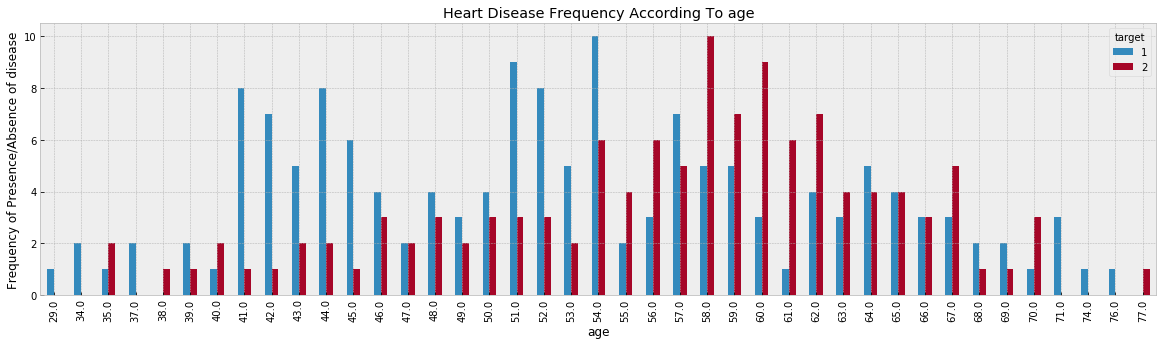

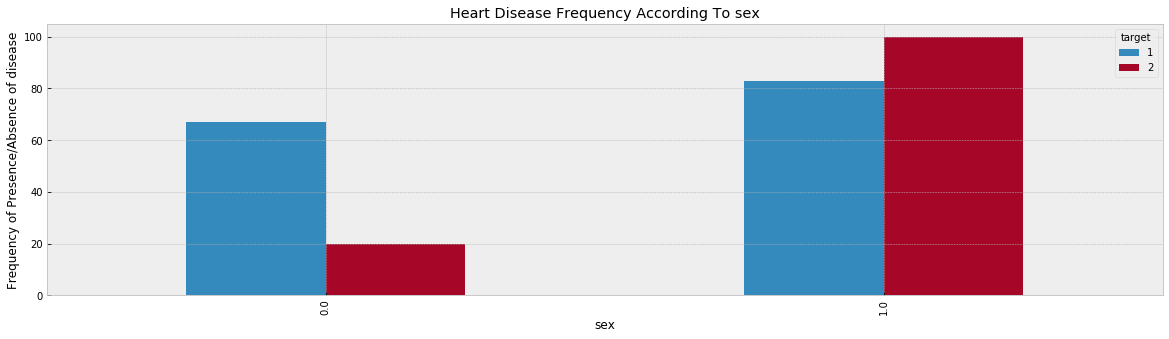

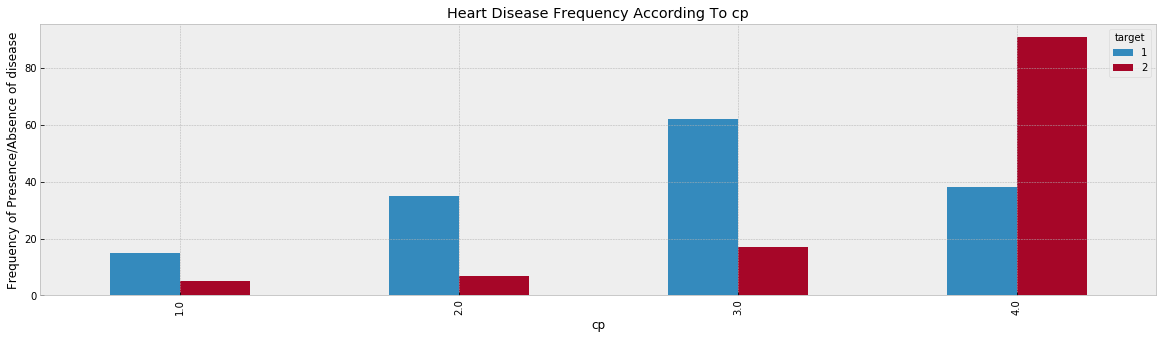

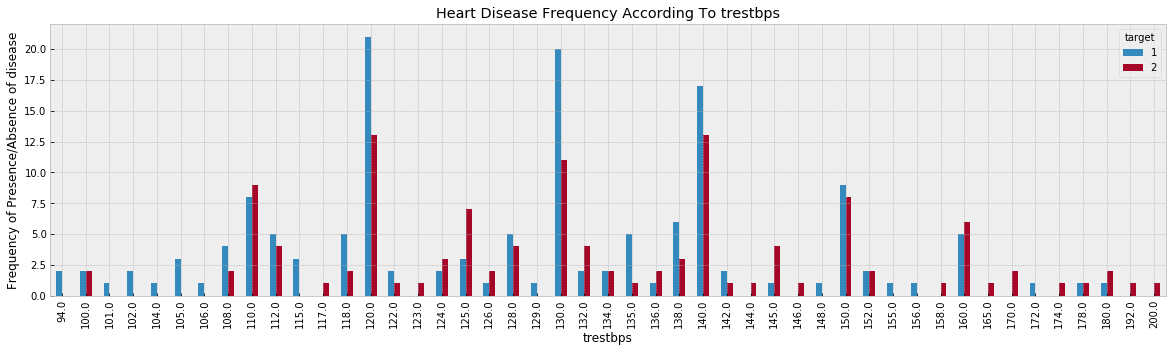

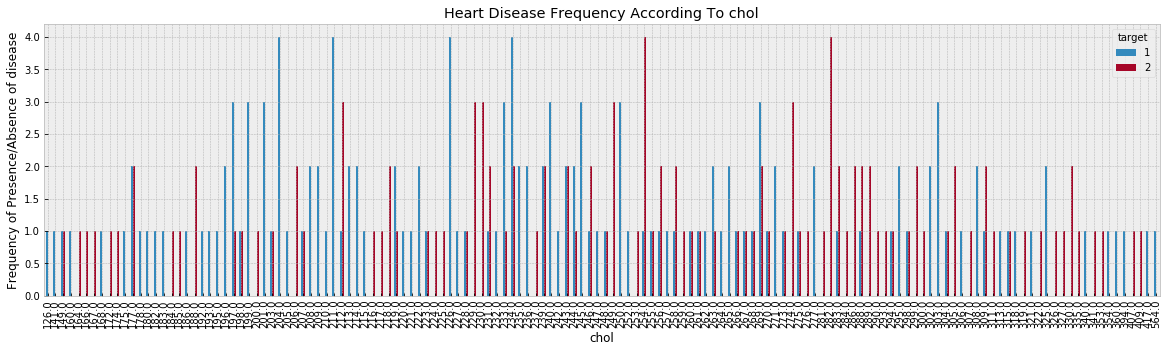

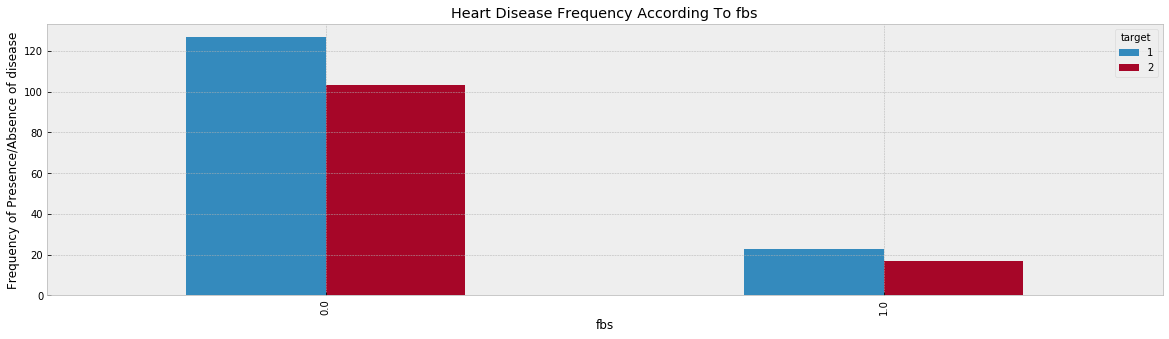

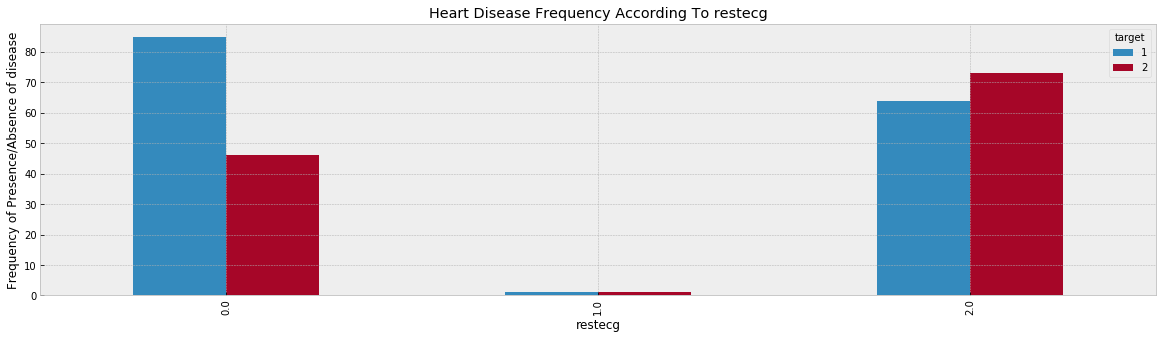

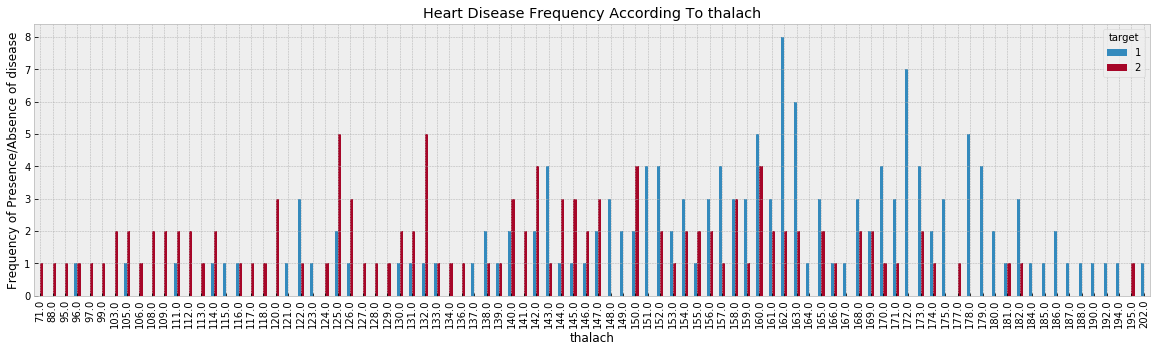

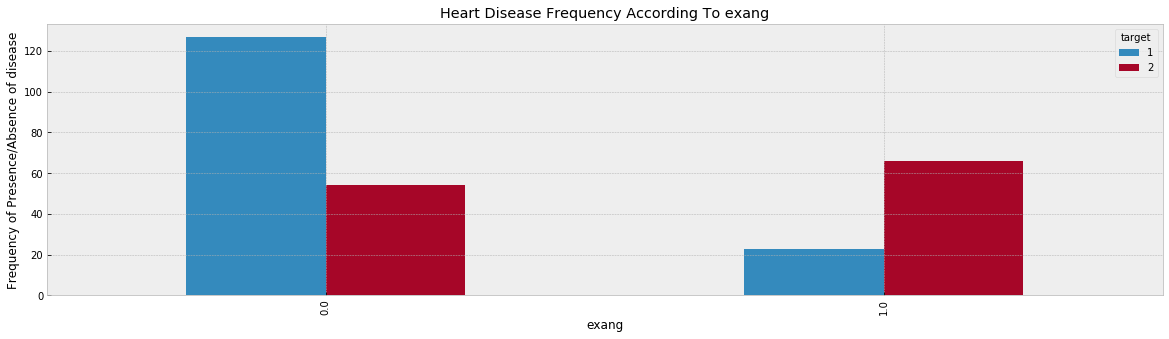

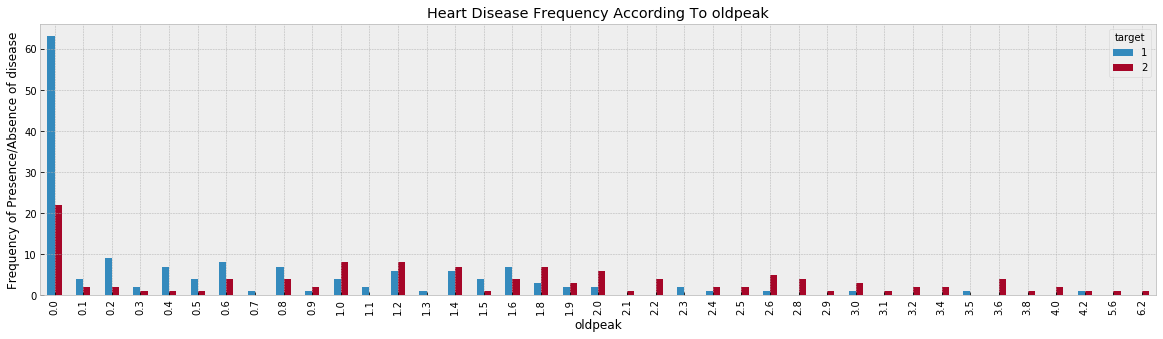

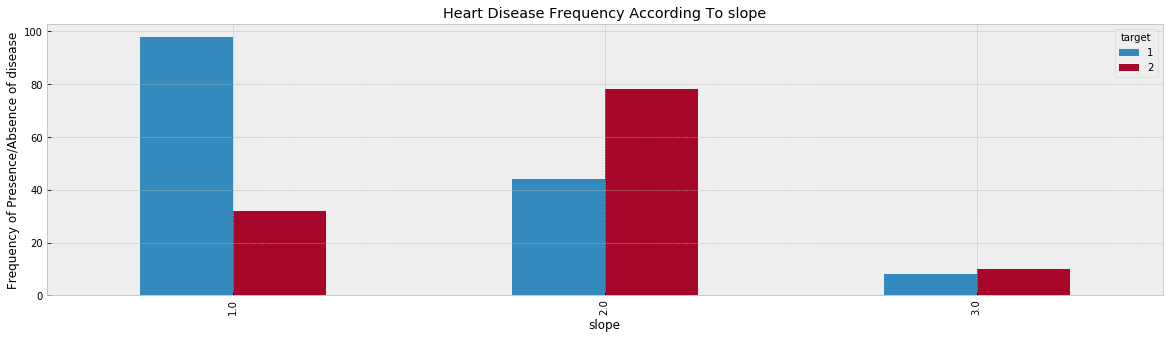

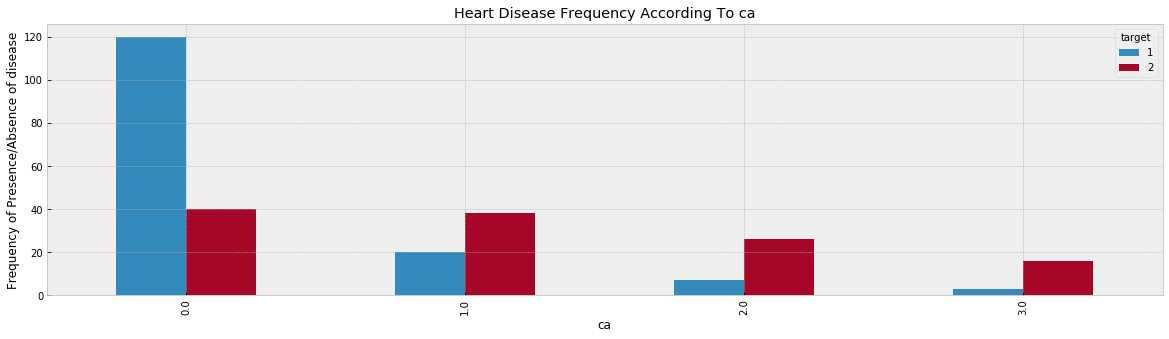

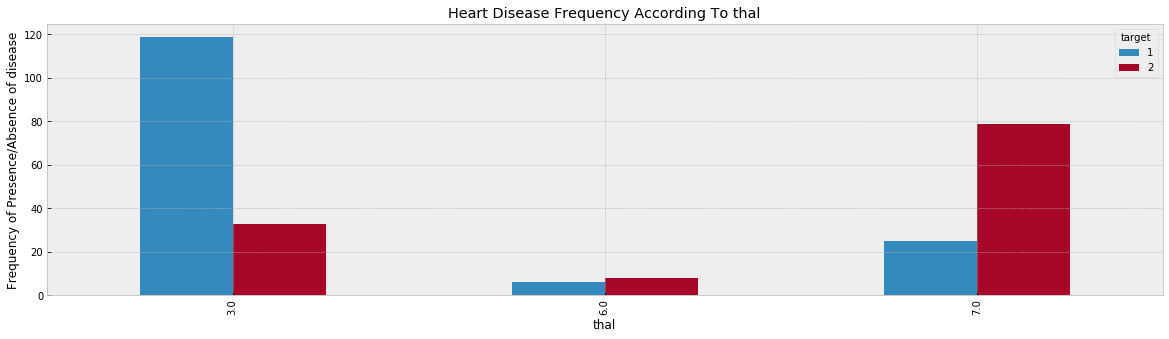

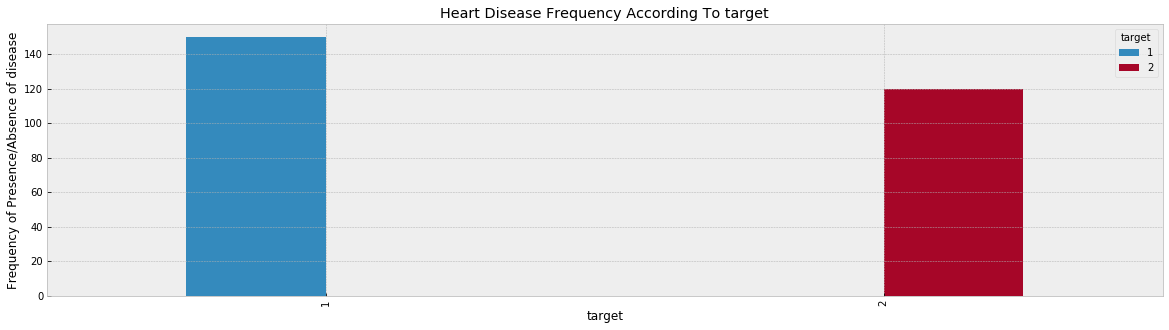

In [4]:
size = len(ds.columns)
plt.style.use('bmh')
for val in ds.columns:
    pd.crosstab(ds[val],ds.target).plot(kind="bar",figsize=(20,5))
    plt.title('Heart Disease Frequency According To {}'.format(val))
    plt.xlabel(val)
    plt.ylabel('Frequency of Presence/Absence of disease')
    plt.show()

### Feature Standardization

Since we are dealing with algorithms that are influenced by the scale of the input features (such as SVM or KNN), it is preferable to standardize the data in this way:
\begin{align}
x' = \frac{x - \overline{x}}{ S }
\end{align}
\begin{align}\end{align}
where $x$ is the inital vector, $\overline{x}$ is the estimated expected value and $S$ is the estimated standard deviation. Another reason why feature scaling is applied is that gradient descent converges much faster with feature scaling than without it. Moreover using  stochastic gradient descent often we achieved better perfomances.

In [5]:
X = ds.drop(["target"],axis = 1 )
X = (X - X.mean())/X.std()
y = ds["target"]

### BOXPLOT

A boxplot is a very particular method that displays the dataset based on a summary of five numbers: the minimum, the maximum, the median of the sample and the first and third quartiles. The following graph shows only a part of the overall predictors, i.e. those that are not categorical. This time, for each feature we will have two different boxplots. The blue one, which represents the observations that lead to a heart attack, and the red one, which represents the observations that does not cause heart disease. By using this particular interactive library called "Plotly", it is also possible to get additional information such as the presence of outliers. Outliers are anomalous values - that do not comply with the expectations - that may be present, for example, due to an error made by a machine, which may be broken or malfunctioning. These data can adversely affect the performance of a classifier but, as the overall performance is not something we are trying to evaluate so, we will still keep them in our dataset.

In [6]:
X_new = X.drop(['fbs', 'exang', "ca", "thal", "sex", "cp", "restecg", "slope"], axis=1)

In [7]:
data = pd.concat([y,X_new],axis=1)
data = pd.melt(data,id_vars="target",
                    var_name="features",
                    value_name='value')

In [8]:
fig = px.box(data, x="features", y="value", color="target")
fig.update_traces(quartilemethod="exclusive")
fig.show()

### VIOLINPLOT

Violin plots are similar to box plots, except that they also show the probability density of the data at different values. We prove it for completeness.

In [9]:
fig = go.Figure()

fig.add_trace(go.Violin(x=data["features"][data['target'] == 1],
                        y=data["value"][data['target'] == 1],
                        legendgroup='Absence', scalegroup='Yes', name='Absence of disease',
                        side='negative',
                        line_color='blue')
             )
fig.add_trace(go.Violin(x=data["features"][data['target'] == 2],
                        y=data["value"][data['target'] == 2],
                        legendgroup='Heart disease', scalegroup='No', name='Heart disease',
                        side='positive',
                        line_color='orange')
             )
fig.update_traces(meanline_visible=True)
fig.update_layout(violingap=0, violinmode='overlay')
fig.show()

### Correlation Matrix

Another important aspect to consider is the correlation between features. A too close correlation between two or more features can adversely affect classifier performance. The correlation matrix, which is made up of correlation coefficients, helps us identify those relationships. Correlation is a function of covariance, as we can see from the Pearson index:
![alt text](image13.jpg "Pearson Correlation")
Fortunately, the features are not so correlated to each other. Indeed, we can speak of correlation when the Pearson index is greater than at least 0.7. So any predictor can be used for the classification task. This is exactly what we expected, as we saw in the medical introduction.

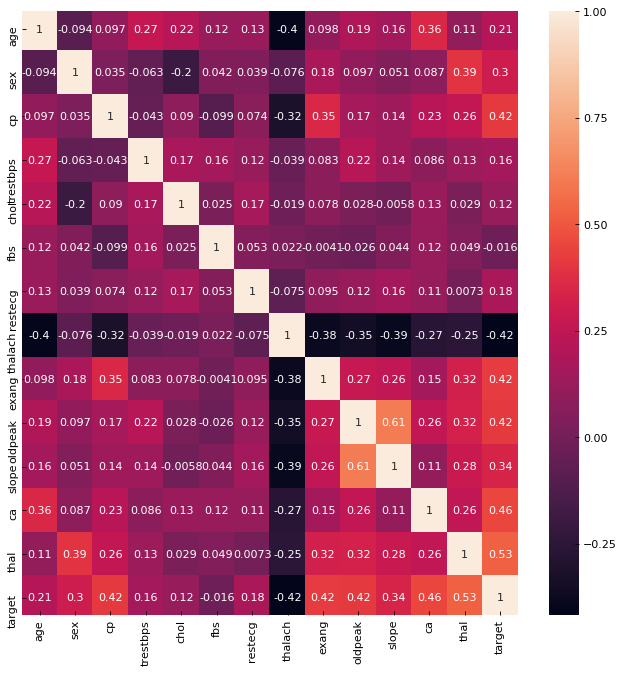

In [10]:
%matplotlib inline
corr = ds.corr(method='pearson')
plt.figure(figsize=(10,10), dpi=80)
ax = sns.heatmap(corr, annot=True)
bottom, top = ax.get_ylim()
ris = ax.set_ylim(bottom + 0.4, top - 0.4)

### Distribution plot

The last step is to trace the distribution. To do this, we use the pair plot function of the Seaborn library which also shows the correlation between the predictors in a graphic way.

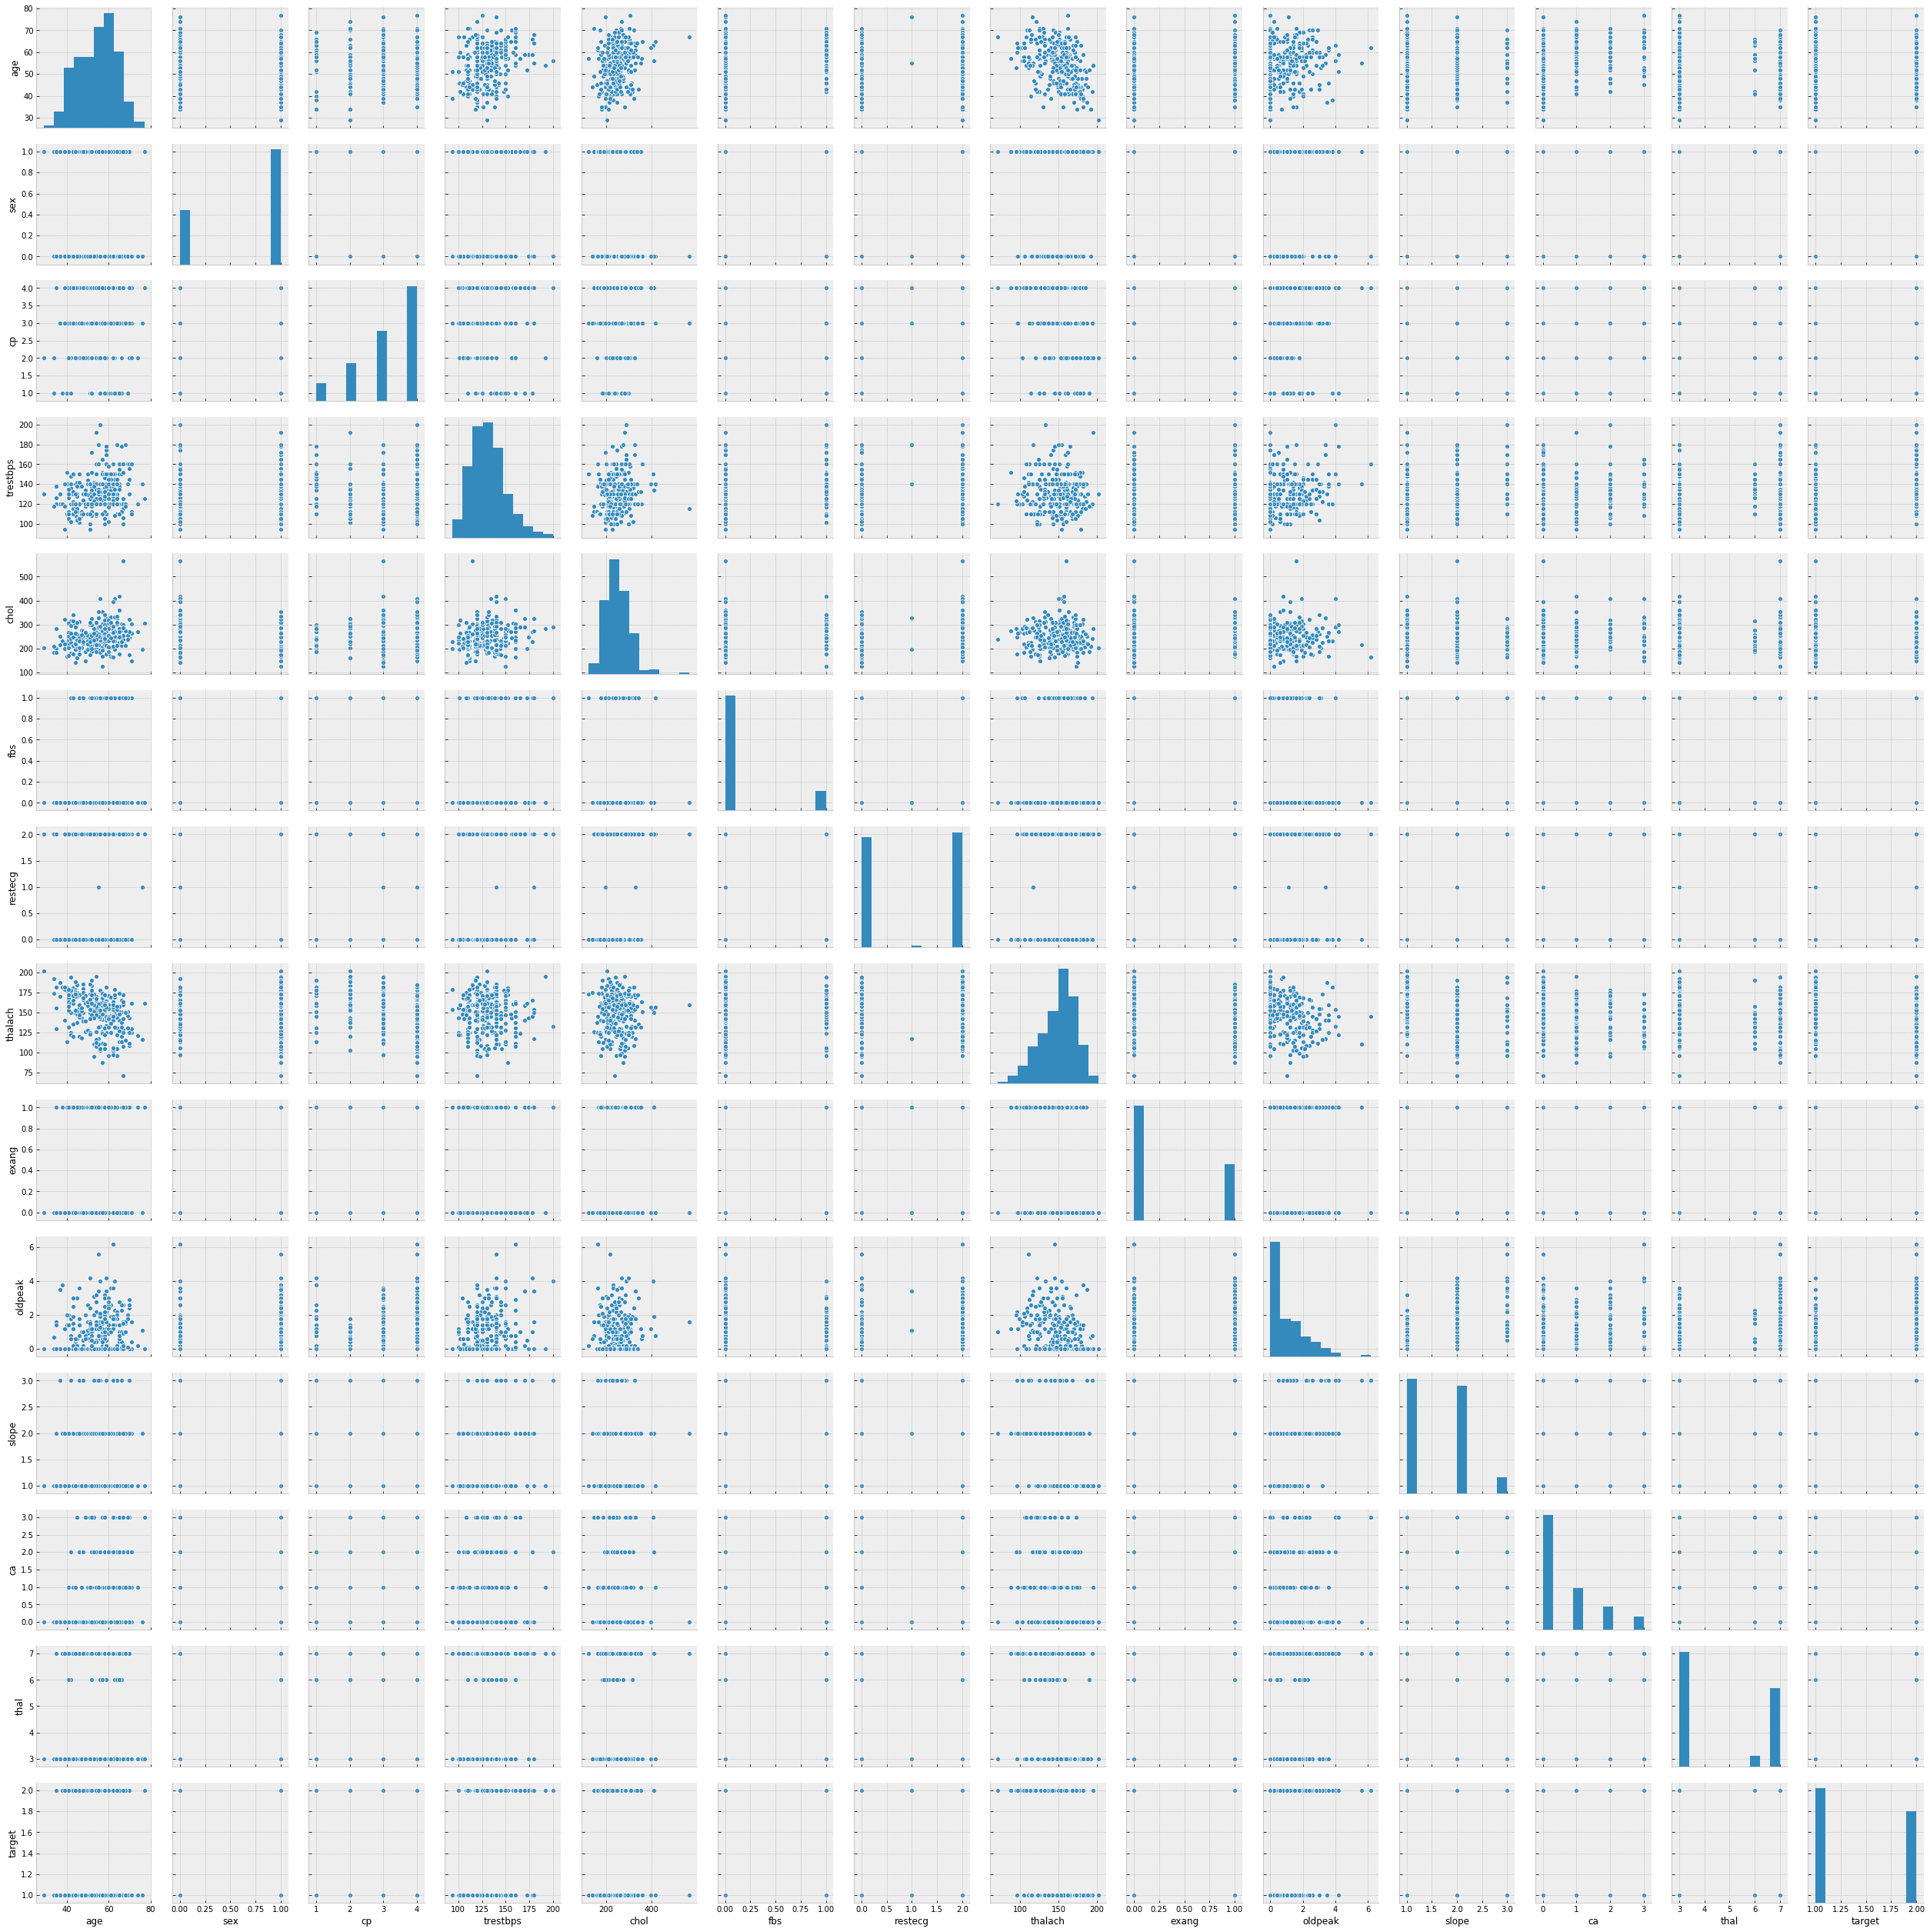

In [11]:
sns.pairplot(ds)

### KNeighbors

The KNN algorithm is the first one that is taken into consideration and it will represent  the first baseline for this task. The way this method works is very simple: first, it stores the entire training dataset, then, when a new record arrives, it calculates the distance between the new point and all the others. The new label is decided by the nearest k points. So the probability that a new observation is assigned to the i-th class can be expressed as:
\begin{align}
P(y = i|x,k) = \frac{1}{k}\sum_{i \in I(x,k)}1(y=i)
\end{align}
\begin{align}\end{align}
where $x$ is a new observation and $I (x, k)$ is a neighborhood of x which contains the k nearest point. The gap between records can be measured in many different ways: if multi-dimensional data are used the Euclidean distance is a smart choice, but there are also different types of criteria, such as those of Mahalanobis, which consider the correlation between the data. Therefore, there is no deterministic way to establish the "K" value, but only the trial and error approach can be used. Assigning K low values means believing that our test distribution will be very similar to that of the train. This can lead to overfitting, but using too high K values can still cause problems, especially when class boundaries are not so distinct. One of the main drawbacks of this algorithm is that it must remember every single point of the dataset. So especially when dealing with huge datasets, this could result in a huge memory effort. Moreover, since this algorithm doesn't have properly a training phase if the number of samples is high the computational work could become intractable. So, since this algorithm doesn't scale very well, it is often used only when dealing with small datasets like ours. Having said that, the performance can be very high because it is not a linear algorithm, so this method will still be our first baseline. For this method, our implementation is also provided in addition to the SKlearn library, a very famous and well-known library in the field of machine learning.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X.to_numpy(), y.to_numpy(), test_size= 0.33, random_state = 6)

In [13]:
class KNE:
    def __init__(self, K = 5):
        self.k = K
        
    def fit(self, X, y):
        self.x = X
        self.y = y
    
    def predict(self, X_train):
        y_pred = []
        for val in X_train:
            sol = np.argsort(np.sqrt(((self.x - val) ** 2).sum(axis = 1)))[:self.k] #la radice poteva essere evitata
            y_k = self.y[sol]
            label = np.argmax(np.unique(y_k, return_counts=True)[1])
            y_pred.append(label + 1)
        return np.array(y_pred)
                

In [14]:
model = KNE(K=15)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Accuracy for own KNE: " + str(accuracy_score(y_pred, y_test)*100)+"%")

Accuracy for own KNE: 87.77777777777777%


In [15]:
model = KNeighborsClassifier(n_neighbors=15)
model.fit(X_train, y_train)
print("Accuracy for KNE: " + str(model.score(X_test, y_test)*100)+"%")

Accuracy for KNE: 90.0%


The result obtained is very similar between the two implementations. The one provided by SKlearn reaches 90% accuracy, a remarkable result. Our implementation, however, with K = 15 reaches about 88%. Using only ten lines of code algorithm, the final result obtained is very high: this is truly remarkable, and also underlines how this simple algorithm works well even if it does not use any particular property or complex mathematical theorem.

### LinearSVM

Support vector machines (or SVM) is a widely used and powerful algorithm, designed and developed by the Russian mathematician Vladimir Vapnik. This algorithm can be used for both regression and classification problems and allows to obtain remarkable results. To understand what is the basis of this algorithm, it is necessary to consider what is illustrated in the following image:
![alt text](image1.png "Linear separable problem")
This is a linearly separable problem and, as illustrated, each row is a possible solution. But, it seems reasonable that if you resample a point in the green population, you can get points closer to the red distribution and, for example, the yellow line (which is very close to the green points) no longer solves this problem. Therefore, we consider the following image: 
![alt text](image2.png "Linear separable problem")
This new line may seem like another solution, but it has something different from the old ones. If we start from the same line and expand to the left and right until we meet the first point of both distributions, the distance from the beginning to the red and green points is the same. This does not guarantee that the classifier will not make mistakes, but it seems reasonable that this classifier is more robust than the others. This is the main intuition of the SVM. From now on we will call the distances between the line and the closest points of the red (or green) distribution margin. These points will form the so-called support vector machines. To calculate the margin we just have to compute:
\begin{align}
\frac{<x^{+} - x^{-}, W>}{2\left \| W \right \|} = \frac{(<x^{+}, W> + b) - (<x^{-}, W> + b)}{2\left \| W \right \|} = \frac{1-(-1)}{2\left \| W \right \|} = \frac{1}{\left \| W \right \|}
\end{align}

So, from the point of view of the optimization problem that we have to solve to determine the supporting vector machine, it follows:

\begin{align}
max_{W, b} \frac{1}{\left \| W \right \|}
\hspace{1cm}S.T. y_i[<x, W> + b] \geq 1
\end{align}
From a matematical point of view this is equivalent to:
\begin{align}
 (1)\hspace{1cm}min_{W, b}\frac{1}{2}\left \| W \right \|^2
 \hspace{1cm}S.T. y_i[<x, W> + b] \geq 1
\end{align}
To solve this problem we can use Lagrange multipliers. This method is often used to find the minimum or maximum of a function subject to some inequality constraints. So with a function $f (x)$ and j constraints $g (x) \ge 0$ we can write a third function called lagrangian:
\begin{align}
\Lambda (x, \lambda ) = f(x) +  \sum_{i = 1}^{j}\lambda_ig_i(x)
\end{align}
in this case:
\begin{align}
\Lambda (W, b, \lambda) = \frac{1}{2}\left \| W \right \|^2 - \sum_{i}\lambda_i[y_i(<x_i, W> + b) - 1]
\end{align}
So to find a minimum for both W and b we have to compute  the partial derivative of the Lagrangian function and we need these derivatives to vanish. So let's calculate:
\begin{align}
\frac{\partial \Lambda (W, b, \lambda)}{\partial W} = W - \sum_i \lambda_iy_ix_i = 0
\end{align}
\begin{align}
\frac{\partial \Lambda (W, b, \lambda)}{\partial b} = \sum_i \lambda_iy_i=0
\end{align}

Now we can replace this result in the starting formula and we obtain:
\begin{align}
max_{\lambda} -\frac{1}{2}\sum_{i,j} \lambda_i \lambda_j y_i y_j <x_i, x_j> + \sum \lambda_i 
\end{align}
\begin{align}
S.T: \sum_i \lambda_iy_i = 0 \hspace{1cm} \lambda_i >=0
\end{align}
This problem is also called dual problem.So, finally we have derived that our weight W are equal to:
\begin{align}
 W = \sum_i \lambda_iy_ix_i
 \end{align}
This is the solution to problem $(1)$ and when we solve this optimization function we get that many of the lambda values are equal to 0. The only non-zero values are the points of each class that is on the margin. Those vectors are those that "support" the decision function, for this reason this algorithm is called SVM. This result is extremely relevant. This means that to build the classifier we need very few points, and all the others can be discarded. Hence, the memory effort required to calculate this algorithm is much less than that required, for example, by KNN or Perceptron. Furthermore, by using this algorithm, we are sure to minimize the empirical risk of making a mistake. The huge drawbacks of this algorithm is that it can only be used for linearly separable problems. But most applications deal with non-linear separable problem, such as the following:
![alt text](image5.png "Non-linear separable problem")


So Vladimir's idea was to add a slack variable as follows:

\begin{align} <x, W> + b\geq 1 -\xi  \hspace{1cm} <x, W> + b\leq -1 +\xi \end{align}
 The new task  we have found still represents a convex optimization problem which can be solved using Lagrangian multipliers as previously seen. The only thing that changes this time is that we have to minimize the amount of slack. So the new problem becomes:
 \begin{align}
 \hspace{1cm}min_{W, b}\frac{1}{2}\left \| W \right \|^2 + C\sum_i \xi_i
 \hspace{1cm}S.T.\hspace{0.1cm} y_i[<x, W> + b] \geq 1 - \xi_i,\hspace{0.5cm} \xi_i \geq0
  \end{align}
  
\begin{align}
\Lambda (W, b, \lambda) = \frac{1}{2}\left \| W \right \|^2 + C\sum_i \xi_i - \sum_{i}\lambda_i[y_i(<x_i, W> + b) - 1 + \xi_i] -\sum_i \eta_i\xi_i
\end{align}
This time we have to compute the partial derivate of W, b and xi and equal the result to 0.
\begin{align}
\frac{\partial \Lambda (W, b, \xi, \lambda, \eta)}{\partial W} = W - \sum_i \lambda_iy_ix_i = 0
\end{align}
\begin{align}
\frac{\partial \Lambda (W, b, \xi, \lambda, \eta}{\partial b} = \sum_i \lambda_iy_i=0
\end{align}
\begin{align}
\frac{\partial \Lambda (W, b, \xi, \lambda, \eta}{\partial \xi} = C - \eta_i-\lambda_i=0
\end{align}
Substituting the terms, we get:
\begin{align}
max_{\lambda} -\frac{1}{2}\sum_{i,j} \lambda_i \lambda_j y_i y_j <x_i, x_j> + \sum \lambda_i 
\end{align}
\begin{align}
S.T: \sum_i \lambda_iy_i = 0 \hspace{1cm} \lambda_i \in [0, C]
\end{align}
The only difference compared to what has been done before consists in the fact that the lambda value is limited from 0 to the value of C. But what changes, in practice, if we choose a high or low value of C? The result is clearly illustrated in the following figure.
![alt text](image6.png "Different values of C")
When we set a high C value, we assume that our train distribution is representative of the test distribution. This means that we believe there are not so many outliers, so we prefer to take a lower margin. With this solution there is also a high risk of overfitting. Conversely, when we use a low C value, we allow more errors and take a larger margin. Using this solution, we generally have a lower risk of overfitting.

In [16]:
for i, val in enumerate(y_train):
    if val == 2:
        y_train[i] = -1
for i, val in enumerate(y_test):
    if val == 2:
        y_test[i] = -1

In [17]:
model = LinearSVC(C=10, max_iter = 1000000)
model.fit(X_train, y_train)
print("Accuracy for LINEARSVC: " + str(model.score(X_test, y_test)*100)+"%")

Accuracy for LINEARSVC: 90.0%


### OWN LinearSVM

The result obtained using the SVM algorithm provided by the SKlearn library is quite good, with an accuracy score of 90%. Before proceeding, we decided to implement our SVM using a Stochastic Gradient Descent algorithm (SGD). The key difference from the standard gradient descent is that only one piece from the dataset is used to calculate the step and the piece is randomly collected at each step.
\begin{align}
\end{align}
![alt text](image7.jpg "SVM implementation")
\begin{align}
\end{align}
The quantity $1 / \lambda$ is simply C, so we choose a $\lambda$ value of 0.1. In this way, we have a result comparable to the previous one.

In [18]:
theta = np.zeros(X_train.shape[1])
t = 1000000
lam = 0.1
b = 0

for idx in range(t): 
    w = lam/t * theta
    i = random.randint(0, X_train.shape[0] - 1)
    #expr = y_train[i] * (np.dot(x_train[i], w) + b)
    expr = y_train[i] * np.dot(X_train[i], w) 
    if expr < 1:
        theta += y_train[i] * X_train[i]
        #b += y_train[i]
w_hat = w.sum()/t 

In [19]:
y_res = np.zeros(X_test.shape[0])
for i, val in enumerate(X_test):
    res = np.dot(val, w) + b
    if res > 0:
        y_res[i] = 1
    else:
        y_res[i] = -1
print("Accuracy for own Svm: " + str(accuracy_score(y_test, y_res)*100)+"%")

Accuracy for own Svm: 90.0%


The end result is still (approximately) 90%. We have some fluctuation due to the randomness introduced by the SGD, but this underlines that the algorithm that we have implemented works properly.

### Decision tree

The decision tree is one of the most used algorithms in the field of machine learning. It uses a top-down and recursive approach that allows this method to obtain understandable and easily interpretable results. This is perhaps the main advantage of the algorithm. In addition, decision trees can easily adapt to large data sets and can also be used to manage both categorical and numerical data. This type of algorithm is therefore quite adequate for our dataset, although there are only two hundred and seventy samples. Decision trees actually get a better result if used for huge datasets. Decision trees are in fact designed to scan all the characteristics and find a value for each predictor that allows better discrimination between the healthy and the sick. From all this predictor we choose the one that has the best policy value (discussion about it shortly) and we split the tree. Now we have two new branches. For each branch, we repeat this procedure until all the data has been correctly classified. Finding the best solution is computationally impossible, so let's follow this greedy approach. We have already said before that different policies can be followed: minimizing the residual sum of squares ($RSS$) is a common choice in a regression task, but since we are in a classification setting we opt for the $Gini$ index. The Gini value for a node N is the following:
\begin{align}
Gini(N) = 1 - \sum_{i}^{\# Classes} [p(i|N)]^2
\end{align}
Where $p (i | N)$ is the relative frequency of class i in node N. It is clear that the highest value that Gini can reach is (1-1 / (# classes)) and the lowest is 0, namely when all points belong to the same class i. Using this policy we obviously create a new division for the features that get the lowest value of this index. When a node N is divided into k children, the quality of the split is calculated as:
\begin{align}
GINI_{split} = \sum_{i}^{k}\frac{n_i}{n}GINI_i
\end{align}
Where ni is the number of records in the child i and n is the number of records in node p. Using this whole procedure to generate a decision tree can often lead to an overfitting problem. Indeed, building a decision tree in this way can create a very deep structure that may not be able to generalize with new data. So, a simple but very effective technique to avoid this problem is to prune the tree itself to a certain depth. In this way, we create a more robust tree that can generalize better. This is exactly what we did using the decision tree implementation provided by the SKlearn library. When we use the decision tree with maximum depth, the accuracy is 80%. Conversely, when we prune the tree to the 4th level, the result is better with a final precision of about 81%. In the image below, we can see all four divisions. As we have already seen in the correlation matrix and in the introduction, the parameters of "thal", "oldpeak" and "cp" are very important for discriminating between classes.

In [20]:
clrTree = DecisionTreeClassifier(random_state=2)
clrTree.fit(X_train, y_train)
outTree = clrTree.predict(X_test)
print("Accuracy for Decision Tree Classifier with the maximum depth: " + str(accuracy_score(y_test, outTree)*100)+"%")

Accuracy for Decision Tree Classifier with the maximum depth: 80.0%


In [21]:
clrTree = DecisionTreeClassifier(random_state=2, max_depth = 4)
clrTree.fit(X_train, y_train)
outTree = clrTree.predict(X_test)
print("Accuracy for Decision Tree Classifier with depth = 4: " + str(accuracy_score(y_test, outTree)*100)+"%")

Accuracy for Decision Tree Classifier with depth = 4: 81.11111111111111%


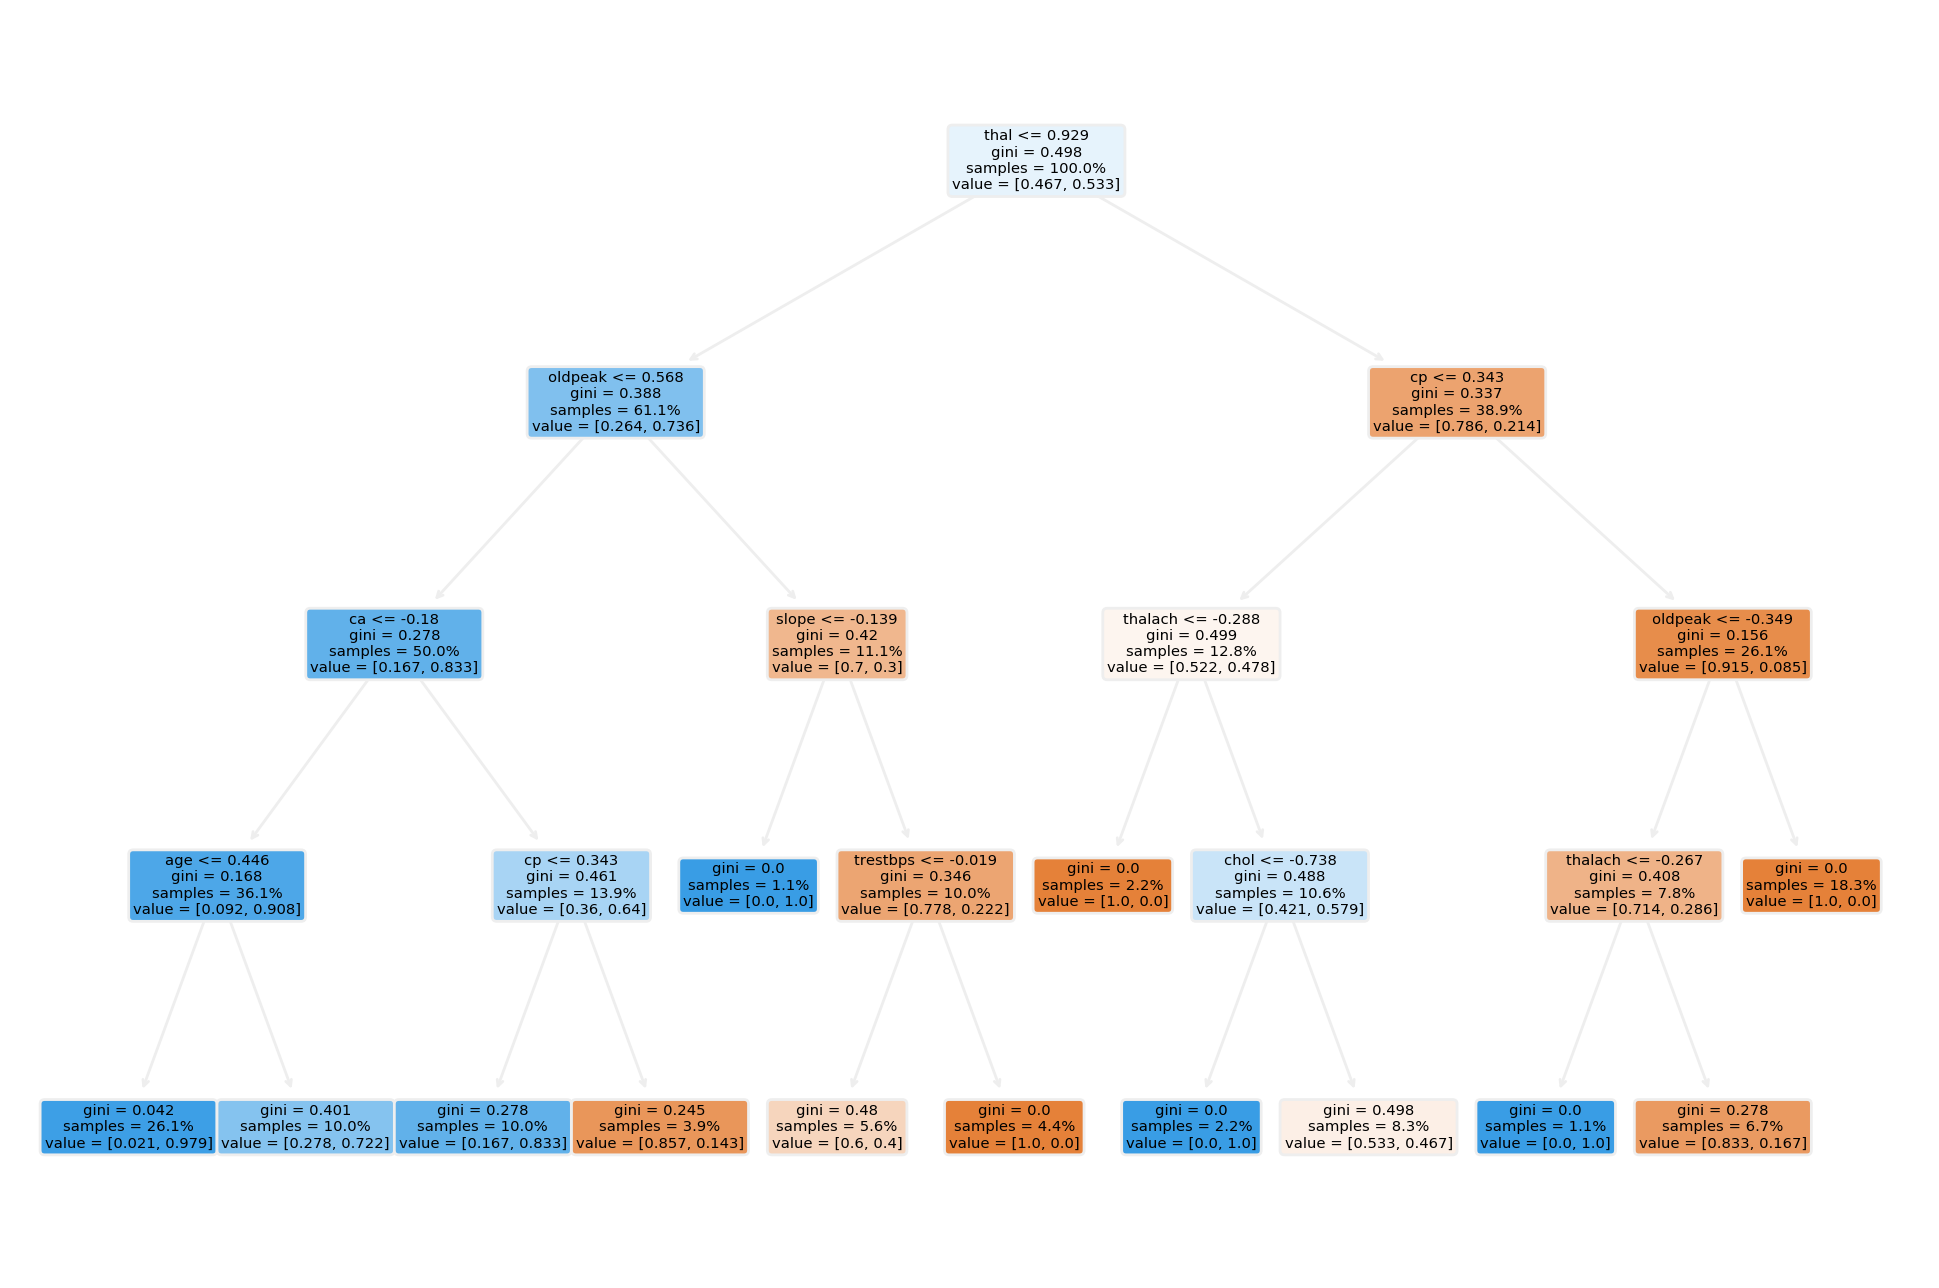

In [22]:
plt.figure(dpi=400)
c = tree.plot_tree(clrTree, filled = True, proportion = True, rounded = True, feature_names=ds.keys())

### Random Forest

In order to talk about random forest, we must first specify what a bootstrap and an ensemble method are. Bootstrap is a resampling method used to estimate the standard error associated with a certain estimator. This is possible using only the i.i.d. samples of the training set even if we don't have any parametric form of the population. Instead, the ensemble uses multiple learning algorithms to achieve better predictive performance. That said, the random forest is made up of decorrelated bootstrapped trees. This means that this algorithm, to decide the class of a sample, records the labels provided by M different decision trees and takes the majority vote. We said that trees are decorrelated because they don't consider all the possible features available but only a subset of them. Generally, we select a number of predictors that is equal to √n. An example on this will be given below. Finally, the samples used by each tree are obtained using a bootstrap procedure. In this way the variance of the statistical learning method is reduced. The bootstrap phase is very simple Instead of using, every time, all the N sample of the training set, we obtain distinct data sets (one for each tree) by repeatedly sampling observations from the original data set with replacement.  In this way, the bootstrap approach allows us to simulate the process to get more data. Having said that the ensemble and the bootstrap effects boost the performance of the decision tree classifier remarkably.

In [23]:
clrTree = RandomForestClassifier(n_estimators = 1000, random_state = 2, max_features = "log2", max_depth = 5)
clrTree.fit(X_train, y_train)
outTree = clrTree.predict(X_test)
print("Accuracy for Random Forest Classifier with log2(features): " + str(accuracy_score(y_test, outTree)*100)+"%")

Accuracy for Random Forest Classifier with log2(features): 90.0%


In [24]:
clrTree = RandomForestClassifier(n_estimators = 1000, random_state = 2, max_features = "sqrt", max_depth = 5)
clrTree.fit(X_train, y_train)
outTree = clrTree.predict(X_test)
print("Accuracy for Random Forest Classifier with sqrt(features): " + str(accuracy_score(y_test, outTree)*100)+"%")

Accuracy for Random Forest Classifier with sqrt(features): 90.0%


In [25]:
clrTree = RandomForestClassifier(n_estimators = 400, random_state = 2, max_features = 13, max_depth = 5)
clrTree.fit(X_train, y_train)
outTree = clrTree.predict(X_test)
print("Accuracy for Random Forest Classifier with max(features): " + str(accuracy_score(y_test, outTree)*100)+"%")

Accuracy for Random Forest Classifier with max(features): 83.33333333333334%


Finally, we have tested the random forest using a different number of features for each tree. As we said before using, a smaller number of predictors decorrelate each classifier. As we can see the performances achieved with a reduced number of features improve the final result. The accuracy achieved 0.9 as the svm classifier. While using all the possible predictors a 7% accuracy drop is registered. This final result confirms our expectation. 

### Logistic Regression

Logistic regression is a specific type of generalized linear model. It is a very simple model capable of handling both categorical and continuous data. It is used to solve binary problems, such as ours, in which we want to predict whether or not a person will have a heart attack. To explain this model, we make a really simple graph: in the x-axis we choose a feature at random for example trestbps while in the y axis we put the probability of having a disease. So, the observations of trestbps associated with an heart-attack are labeled with p=1 otherwise with p = 0. The result is showed in the following graph.
\begin{align} \end{align}
![alt text](image10.jpg "Trestbps/probability plot")
\begin{align} \end{align}
The goal to be achieved is to find a curve, such as the following, which allows us to understand if any person can have heart disease based, this time, on the number of "Trestbps". For example: in this case, with a "Trestbps" of 160, the probability of having heart disease is 80%, therefore the person is classified as sick. Conversely, with a "Trestbps" of less than 100, the person is identified as healthy, because the probability of illness in this case is around 0%.
\begin{align} \end{align}
![alt text](image11.jpg "Trestbps/probability plot")
\begin{align} \end{align}
At this point, to understand how we have obtained this curve we have to change domain, in particular, we pass in the log(ODDS) one. In this new space, we have that our points with p = 1 are located at +inf the other at -inf.
\begin{align}
log(ODDS) = log(\frac{p}{1-p})
\end{align}
if p = 1:
\begin{align}
log(ODDS) = log(\frac{1}{1-1}) = log(1) - log(0) = +inf
\end{align}
instead if p = 0:
\begin{align}
log(ODDS) = log(\frac{0}{1-0}) = log(0) = -inf
\end{align}
\begin{align}\end{align}
At this point, the main idea according to this method is to project these points in a straight line (how to find this line will be explored further). Finally, we come back to the initial domain using the inverse formula:
\begin{align}\end{align}
\begin{align}
p = \frac{e^{log(ODDS)}}{1+e^{log(ODDS)}}
\end{align}
\begin{align}\end{align}
So, to understand the goodness of the line we have chosen, we can calculate the likelihood for each sample and add the whole. Obviously, the best line is the one that maximizes the log-likelihood. So if $x$ is the matrix that represents the data, we can rewrite the log(ODDS) as:
\begin{align}\end{align}
\begin{align}
log(ODDS) = -w^tx
\end{align}
and we write:
\begin{align}
p(y = 1|w,x) = \frac{e^{-w^tx}}{1+e^{-w^tx}}
 \hspace{2cm}
p(y = 0|w,x) = \frac{1}{1+e^{-w^tx}}
\end{align}
\begin{align}\end{align}
The problem becomes finding a $w$ matrix that maximizes the likelihood. The strategy we follow is the classic one, namely the gradient ascent:
\begin{align}\end{align}
\begin{align}
L(w) = \prod_i p(y = 1|w,x)^{y_i}p(y = 0|w,x)^{1-y_i}
\end{align}
\begin{align}\end{align}
We can use the log of this function since the logarithm is a monotonous increasing function therefore it does not change the stationary point of the function, but it becomes easier to derivate.
\begin{align}\end{align}
\begin{align}
logL(w) =\sum_i y_iln(\frac{e^{-w^tx_i}}{1+e^{-w^tx_i}}) +(1-y_i)ln(\frac{1}{1+e^{-w^tx_i}}) = -\sum_i y_iw^tx_i + ln(1+e^{-w^tx_i})
\end{align}
\begin{align}\end{align}
\begin{align}
\frac{\partial log(L(w))}{\partial w}= -\sum_i y_ix_i + \sum_ix_i( \frac{e^{-w^tx_i}}{1+e^{-w^tx_i}}) = -\sum_i x_i(y_i - p(y=1|w,x))
\end{align}
\begin{align}\end{align}
Finally, we update the lambda value until we no longer get any improvement for the likelihood function. Epsilon is the so-called step-size or learning rate. It is an important hyperparameter to set and there is no deterministic way to define it. If we choose a number that is too high for this value, the algorithm can converge in a suboptimal result, or diverge. Instead, if we choose too low a number, we need too many iterations to find the result.
\begin{align}\end{align}
\begin{align}
w^{i} = w^i + \varepsilon \cdot  \frac{\partial log(L(w))}{\partial w^i}
\end{align}
\begin{align}\end{align}
To avoid overfitting we can add another term to the expression, called regularization. So if we assume that $w$ has a normal distribution with mean 0 and standard deviation equal to $\sigma$ we can add this information to our model which becomes:
\begin{align}\end{align}
\begin{align}
w^{i} = w^i + \varepsilon \cdot  \frac{\partial log(L(w))}{\partial w^i} - \varepsilon \frac{w^i}{\sigma^2}
\end{align}
\begin{align}\end{align}
In this case, we no longer speak of the estimate of maximum likelihood, but we call it maximum a-posteriori probability (MAP). Again we provide both our implementation and SKlearn. The result is identical: 90% of the accuracy score.

In [26]:
for i, val in enumerate(y_train):
    if val == -1:
        y_train[i] = 0
for i, val in enumerate(y_test):
    if val == -1:
        y_test[i] = 0

In [27]:
lr = LogisticRegression(random_state=2)
lr.fit(X_train, y_train)
res = lr.predict(X_test)
print("Accuracy for Logistic regression: " + str(accuracy_score(y_test, res)*100)+"%")

Accuracy for Logistic regression: 90.0%


In [28]:
import scipy #used for sigmoid
class LogisticRegression_own:
    def __init__(self, lr=1, n=100):
        self.lr = lr
        self.n_iter = n

    def fit(self, X, y):
        self.w = np.zeros(X.shape[1])
        for i in range(self.n_iter):
            z = np.dot(X, self.w)
            h = scipy.special.expit(z)
            delta = np.dot(X.T, (h - y)) / y.size
            self.w -= self.lr * delta

    def predict(self, X_test):
        res = scipy.special.expit(np.dot(X_test, self.w))
        return res >= 0.5

In [29]:
lr = LogisticRegression_own(lr = 0.001)
lr.fit(X_train, y_train)
res = lr.predict(X_test)
print("Accuracy for own Logistic regression: " + str(accuracy_score(y_test, res)*100)+"%")

Accuracy for own Logistic regression: 90.0%


### PCA

Since the final accuracy does not seem to increase further, we can try to represent our input data in a space of a smaller size to check if the new representation is more accurate than the previous one. The most common algorithm used to reduce the number of dimensions is the Principle Component Analysis (PCA). The main idea in PCA is to project an initial space into a subspace that minimizes the projection error. Hence, if we have M vectors in d dimensions, the PCA algorithm wants to find a compression matrix W that induces a mapping x → Wx, where Wx is the representation of the lower dimensionality of x. Then we want to find a second matrix U capable of recovering the initial M vectors  from their compressed version. To get these two matrices, we need to solve the following optimization problem:
\begin{align}
argmin_{W, U} \sum_{i}^{M} \left \| x_i - UWx_i \right \|_2^2
\end{align}

The optimal solution is obtained by setting W equal to the eigenvectors with the greatest eigenvalues of the empirical variance-covariance matrix. So, if $\widehat{x}$ represents our standardized samples we have:

\begin{align}
varcov(x) = \frac{<\widehat{x}^{t} ,\widehat{x}>}{N_{sample}}
\end{align}
In this case, we get a 13X13 symmetric matrix. From this matrix, we can calculate the values of eigenvectors and eigenvalues. Eigenvectors sorted by eigenvalue represent the directions in which the variance changes the most. To understand how important each component is, we are interested in knowing the proportion of variance explained by each. To calculate, for example, this quantity for the Dth  main component, we can take the Dth eigenvalue and divide it by the sum of all the values of the eigenvalue vector. Therefore, the Dth component is always a value in the range [0.1]. So we can track how PVE changes over time and we can also visualize cumulative PVE. A commonly used pattern for choosing the right number of main components to use is to look at the cumulative PVE and choose a number of dimensions N where CPVE (N)> 0.85.

In [30]:
X = ds.drop(["target"],axis = 1 )
X = (X - X.mean())/X.std()
y = ds["target"]

xx = np.dot(X.T, X)/X.shape[0]
w, v = np.linalg.eig(xx)
explained_variance_ratio = []
appo = np.argsort(-w)
val = np.array([1,2,3,4,5,6,7,8,9,10,11])
for i in range(0,10):
    explained_variance_ratio.append(w[appo[i]]/w.sum())
#print(explained_variance_ratio)
explained_variance_ratio =  np.array(explained_variance_ratio)

fig = go.Figure(data=go.Scatter(x=val, y=explained_variance_ratio))
fig.update_layout(
    xaxis_title="Principal Component",
    yaxis_title="Prop. Variance Explained"
)
fig.show()
fig = go.Figure(data=go.Scatter(x=val, y=np.cumsum(explained_variance_ratio)))
fig.update_layout(
    xaxis_title="Principal Component",
    yaxis_title="Cumulative Prop. Variance Explained"
)
fig.show()

#print(np.linalg.norm(v,2))
#print(np.cumsum(explained_variance_ratio))

To understand if everything works correctly, we decide to also use the SKlearn implementation of the PCA, and then compare the result obtained. As illustrated in the graph below, the results of our implementation products are practically the same as the SKlearn PCA. This underlines that no mistakes are made. Since we are working with eigenvalues and eigenvectors, we must remember that the final result can be equal at less than  a - sign.

In [31]:
pca = PCA(n_components=10)
pca.fit_transform(X)

fig = go.Figure(data=go.Scatter(x=val, y=pca.explained_variance_ratio_))
fig.update_layout(
    xaxis_title="Principal Component",
    yaxis_title="Prop. Variance Explained"
)
fig.show()

fig = go.Figure(data=go.Scatter(x=val, y=np.cumsum(pca.explained_variance_ratio_)))
fig.update_layout(
    xaxis_title="Principal Component",
    yaxis_title="Cumulative Prop. Variance Explained"
)
fig.show()

The only problem is that, in this case, using the aforementioned rule of thumb of 0.85 the number of dimensions is really high and it is impossible to have a visual interpretation of it. So, in order to trace the result first, let's try to trace the result in a 3D space and then adapt it also to a 2D space.

In [32]:
import plotly.express as px
v_2 = v[:, appo[:3]]
X_pca = np.dot(X, v_2)
df = pd.DataFrame(X_pca, columns =["PC1", "PC2", "PC3"])
df["target"] = y
fig = px.scatter_3d(df, x='PC1', y='PC2', z='PC3',
                  color='target')
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size= 0.33, random_state = 6)
fig.show()

Looking at the graph above, it is difficult to imagine a plane capable of perfectly separating the yellow points from the blue ones. In fact, when we try the linear SVM, the final score obtained is only 86% of the accuracy: four points less than before. The same result is obtained by reducing the number of main components to two. Since we operate in two dimensions, it is possible to trace the decision boundaries of the SVM classifier by means of a Voronoi diagram, which for each class shows the corresponding area on the plot. We also trace how these limits change when the C value increases with each test.

In [33]:
model = LinearSVC(C=10, max_iter = 1000000)
model.fit(X_train_pca, y_train_pca)
print("Accuracy for LINEARSVC: " + str(model.score(X_test_pca, y_test_pca)*100)+"%")

Accuracy for LINEARSVC: 86.66666666666667%


### Function to plot decision function

In [34]:
def plotDiffSVM(svms, X, y, C, message, X_plot, y_plot):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    plt.figure(figsize=(14, 7), dpi=90)
    
    for i, clf in enumerate(svms):
        if len(svms) != 1:
            plt.subplot(2, 4, i + 1)
            plt.subplots_adjust(wspace=0.8, hspace=0.4)
        else:
            plt.figure(figsize=(10, 5));

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        # Put the result into a color plot
        
        plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.8)
        
        # Plot also the training points
        plt.scatter(X_plot[:, 0], X_plot[:, 1], c=y_plot, cmap=plt.cm.coolwarm, edgecolor = "k", s=20)
        plt.xlabel('PC 1')
        plt.ylabel('PC 2')
        plt.title(f"{message} {C[i]}")
    plt.show();

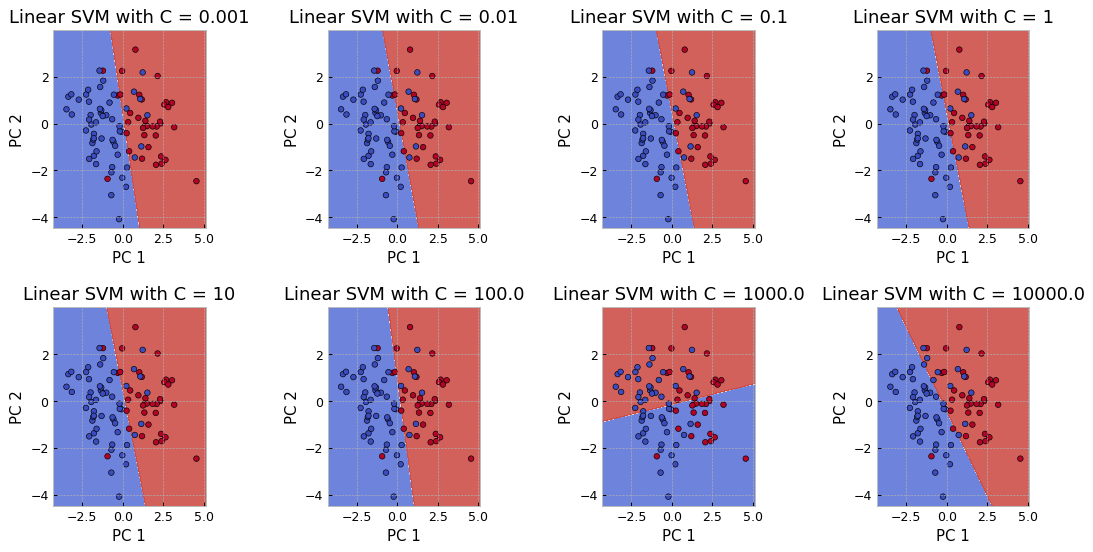

In [35]:
svms = []
acc_s = []
C = [1e-3, 1e-2, 1e-1, 1, 10, 1e+2, 1e+3, 1e+4]
v_2 = v[:, appo[:2]]
X_pca = np.dot(X, v_2)
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size= 0.33, random_state = 6)

for val in C:
    svm = LinearSVC(C = val, random_state=0)
    svm.fit(X_train_pca, y_train_pca)
    svms.append(svm)
    y_pred_test = svm.predict(X_test_pca)
    acc_s.append(accuracy_score(y_test_pca, y_pred_test)) 
    
plotDiffSVM(svms, X_train_pca, y_train_pca, C,"Linear SVM with C =", X_test_pca, y_test_pca)

### KMEANS

While PCA looks for a low-dimensional representation of input data, clustering algorithms look for subsets of points that have similar characteristics. The most common clustering algorithm is the so-called K-means. This method consists of one of the simplest unsupervised learning algorithms, which means that this algorithm does not need the label of the observations  in order to work. This method aims to separate input observations into K-partition, where K is a pre-specified number set by the user. There is no deterministic way to set this hyperparameter, but there is a common rule later explained.  For this algorithm, a good cluster is the one which presents a small within-cluster variation (WCV) Several measures can be used as WCV, but the most common is the Euclidean distance So, the problem becomes an optimization task:
\begin{align}
 SSE = \sum_{i}^{K}\sum_{x\in C_k} \frac{(x - m_i)^2}{|C_k|}
\end{align}
\begin{align}
\end{align}
\begin{align}
min_{C_k} SSE
\end{align}
Where x is a data point in cluster Ck and mi is the representative point for cluster Ci. It can be easily shown that mi corresponds to the centre (mean) of the cluster. Instead $|Ck|$ reppresents the cardinality of the Kth cluster. Finding an optimal solution to this problem is computationally infeasible since there are $k^n$ ways to partition n observations into K clusters.
However, there are some heuristic algorithms that guarantee that the SSE value decreases with each step. One of these methods is the following:
\begin{align} \end{align}
![alt text](image8.jpg "K-means algorithm")
\begin{align} \end{align}
The computational effort of this algorithm is proportional to the number of points, times the number of clusters, times number of iterations, times the number of features for each point.A good way to reduce the value of the SSE is to increase the number of possible K clusters. This could also be a good strategy for choosing the correct value of K. We use a trial and error approach and, as long as the SSE does not stop decreasing significantly, we continue to increase K. When SSE functions are more or less stable, we fix that number of clusters. Moreover, since we have no guarantee of ending with a global minimum if we run this algorithm, for example, four times, it is very likely that it has four different solutions.
![alt text](image9.jpg "Different solutions")
\begin{align} \end{align}
The way in which the starting points of the clusters are chosen therefore becomes very important. If the starting points are not initialized correctly, some clusters may be empty. Therefore, it is often recommended to run the algorithm more than once or to implement a smarter way to initialize the starting points. The K-mean implementation of the SKlearn library intelligently selects the initial cluster to accelerate convergence if you choose the "kmeas ++" hyperparameter. Having said that, after a PCA transformation that reduces the number of dimensions to two, we perform our implementation of the algorithm. This time it is clear that the hyperparameter K must be set to two, since we only have two classes: disease or absence of disease. The result is quite good, with an accuracy score of 82% in most tests. We must remember that this algorithm does not learn any information from the labels, but does so only from the observations themselves.

In [36]:
class KMeans:
    def __init__(self, n_clusters, max_iter):
        self.kl = n_clusters
        self.max_iter = max_iter
        
    def fit_predict(self, xy, plot_clusters = False, plot_step = 5):
        self.points = xy
        self.centroid = np.zeros((self.kl, 2))
        k = 0
        
        for i in range(self.kl):
            rand = np.random.randint(len(self.points))
            self.centroid[i] =  [self.points[rand][0], self.points[rand][1]]
        
        if plot_clusters == True:
            plt.plot(self.centroid[:,0], self.centroid[:,1], color='blue', marker = '*', linestyle='')

        while k < self.max_iter:
            self.calcola_distanza()
            ok  = self.new_center()
            if (ok == True) or (k % plot_step == 0 and plot_clusters == True):
                fig, ax = plt.subplots()
                plt.title(f"Iterazione {k}")
                ax.scatter(self.points[:,0],self.points[:,1], marker="o", c=self.list_compr)
                ax.scatter(self.centroid[:,0], self.centroid[:,1], color='blue', marker = '*')    
                if ok == True:
                    break
            k+=1
            
    
        return self.centroid, k
    
    def calcola_distanza(self):
        self.list_compr = np.array([((point - self.centroid)**2).sum(axis = 1).argmin(axis = 0) for point in self.points])
        
    def new_center(self):
        ok = True
        c_new = np.zeros(2)
        for i, c in enumerate(self.centroid):
            mask = self.list_compr == i
            if len(self.points[mask]) != 0:
                c_new = self.points[mask].mean(axis=0)
                if not np.array_equal(c, c_new):
                    ok = False
            else:
                c_new = c
            
            self.centroid[i] = c_new
            
        return ok
    
    def dump_to_file(self, filename):
        with open(filename, 'w') as f:
            f.write('Id,ClusterId\n')
            for i,val in enumerate(self.list_compr):
                    f.write(f"{i}, {val}\n")
                    
    def silhouette_samples(self):
        self.s = np.zeros(len(self.points))
        d = np.array([np.sqrt(((point - self.points)**2).sum(axis = 1)) for point in self.points])
        for i in range(self.list_compr.size):
            mask = self.list_compr == self.list_compr[i]
            di = d[i][mask].sum()
            ci = self.list_compr[mask].size - 1
            ai = di/ci
            bi = math.inf
            for j in range(len(self.centroid)):
                if self.list_compr[i] == j:
                    continue
                mask = self.list_compr == j
                di = d[i][mask].sum()/self.list_compr[mask].size
                if di < bi:
                    bi = di
            self.s[i] = (bi - ai)/max(ai, bi)
            
        return self.s
    
    def silhouette_score(self):
        return self.s.mean()
    
    def silhouette_plot(self):
        plt.figure()
        plt.plot(np.arange(len(self.s)), np.sort(self.s), color='blue', marker = 'o', linestyle='')
        
    def choose_k(self, ks, ds):
        s_values = np.zeros(len(ks))
        for i, k_value in enumerate(ks):
            self.kl = k_value
            self.max_iter = 100
            self.fit_predict(ds, False)
            s_values[i] = self.silhouette_samples().mean()
        plt.figure()
        plt.plot(ks, s_values)

0.8222222222222222

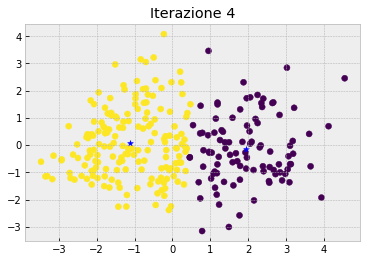

In [37]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
clu = KMeans(2, 100)
cent, it = clu.fit_predict(X_pca)
y_pred = clu.list_compr
y_pred[y_pred == 0] = 2
accuracy_score(y_pred, y)

### Conclusion

It is relevant to note that, without using any particular technique such as GridSearch for the optimization of hyperparameters, the final accuracy is however so high. In any case, we must remember that this dataset is made up of features also used by doctors to understand if a patient is particularly at risk of developing a heart attack or not, which could explain why such a high result is obtained. It is also important to emphasize that every algorithm, supervised or unsupervised, works correctly. PCA is not very useful in this case, but the use of two or three dimensions can allow us to better understand if an algorithm works well or not. With the use of multi-dimensions, it is impossible to trace the data, so understanding if everything works correctly is very difficult. In conclusion, I want to emphasize the fact that this thesis is not focused on how to choose the best algorithm or how to find the best hyperparameters, but the purpose of this work is to show how SVM, Knn and all other machine learning tools work. To do this we have also implemented some naive classifiers to try to better understand how they work. As mentioned above, the data is not large enough to make an interesting analysis of how accuracy changes when we try other hyperparameters or classifiers. Having said that, the final observation wants to underline how simple these methods are to implement but, at the same time, how correclty they behave. They seem to work like magic, but it's just math.